# Определение успешности игр


* **Подготовка данных**

* **Проведите исследовательский анализ данных**

1. Сколько игр выпускалось в разные годы? Важны ли данные за все периоды?
2. Как менялись продажи по платформам? Выбрать платформы с наибольшими суммарными продажами и построить распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
3. Взять данные за соответствующий актуальный период. Определить актуальный период.
4. Какие платформы лидируют по продажам, растут или падают? Выбрать несколько потенциально прибыльных платформ.
5. Оценить влияние на продажи внутри одной популярной платформы отзывов пользователей и критиков.
6. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

* **Составление портрета пользователя каждого региона**

* **Проверить гипотезы**

1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
2. Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.


**Описание данных**
* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы проданных копий)
* EU_sales — продажи в Европе (миллионы проданных копий)
* JP_sales — продажи в Японии (миллионы проданных копий)
* Other_sales — продажи в других странах (миллионы проданных копий)
* Critic_Score — оценка критиков (максимум 100)
* User_Score — оценка пользователей (максимум 10)
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.


## Изучение общей информации

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from IPython.display import display
from scipy import stats as st

In [2]:
df = pd.read_csv('/datasets/games.csv')

In [3]:
df

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


## Обработка данных

### Замена названий столбцов

Для удобства работы со столбцами, приведем их названия к нижнему регистру.

In [4]:
df = df.rename(
    columns={
        'Name': 'name',
        'Platform': 'platform',
        'Year_of_Release': 'year_of_release',
        'Genre': 'genre',
        'NA_sales': 'na_sales',
        'EU_sales': 'eu_sales',
        'JP_sales': 'jp_sales',
        'Other_sales': 'other_sales',
        'Critic_Score': 'critic_score',
        'User_Score': 'user_score',
        'Rating': 'rating'
    }
)

df.head(10)       

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


### Преобразование типов данных

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Итак, смотрим. 

Столбец `year_of_release` удобнее перевести в **datetime64**.

Поскольку мы не можем перевести столбцы `user_score` и `rating` из строк в целочисленные значения без замены пропусков нулями (что очень бы помешало нашим будущим расчетам), то мы их просто оставим в таком положении.

In [6]:
df['year_of_release'] = pd.to_datetime(df['year_of_release'], format='%Y')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   name             16713 non-null  object        
 1   platform         16715 non-null  object        
 2   year_of_release  16446 non-null  datetime64[ns]
 3   genre            16713 non-null  object        
 4   na_sales         16715 non-null  float64       
 5   eu_sales         16715 non-null  float64       
 6   jp_sales         16715 non-null  float64       
 7   other_sales      16715 non-null  float64       
 8   critic_score     8137 non-null   float64       
 9   user_score       10014 non-null  object        
 10  rating           9949 non-null   object        
dtypes: datetime64[ns](1), float64(5), object(5)
memory usage: 1.4+ MB


In [7]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

В колонках с рейтингом (на примере "user_score" мы встретились с неизвестной доныне аббревиатурой **tbd**.
Судя по открытым данным в Интернете, эта аббревиатура от английского To Be Determined (будет определено) или To Be Decided (будет решено). Используется, если какая-то информация еще не определена или решение по вопросу не принято. 

Таким образом, даанная аббревиатура схожа со значением **Nan**, поэтому есть смысл перевести **tbd** в **Nan**.

In [8]:
df['user_score'] = df['user_score'].replace('tbd', np.nan)
df['critic_score'] = df['critic_score'].replace('tbd', np.nan)
df['rating'] = df['rating'].replace('tbd', np.nan)

In [9]:
df['user_score'] = df['user_score'].astype('float64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   name             16713 non-null  object        
 1   platform         16715 non-null  object        
 2   year_of_release  16446 non-null  datetime64[ns]
 3   genre            16713 non-null  object        
 4   na_sales         16715 non-null  float64       
 5   eu_sales         16715 non-null  float64       
 6   jp_sales         16715 non-null  float64       
 7   other_sales      16715 non-null  float64       
 8   critic_score     8137 non-null   float64       
 9   user_score       7590 non-null   float64       
 10  rating           9949 non-null   object        
dtypes: datetime64[ns](1), float64(6), object(4)
memory usage: 1.4+ MB


### Обработка пропусков

Пропуски в столбце `year_of_release` лучше оставить, т.к. они в дальнейшем не будут учтены программой.

Пропуски остались также в стобцах `name`, `genre`, `critic_score`, `user_score` и `rating`. Пропуски в данных столбцах невозможно заменить, так как это очень повлияет на результат наших дальнейших действий с этими столбцами, да и неизвестно, чем их вообще можно заменить, поскольку данные значения никак не связаны друг с другом. 

### Подсчет суммарных продаж во всех регионах

Создадим столбец, куда занесем суммарные показатели продаж для всех регионов.

In [10]:
df['world_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
df.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,world_sales
0,Wii Sports,Wii,2006-01-01,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985-01-01,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008-01-01,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009-01-01,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996-01-01,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
5,Tetris,GB,1989-01-01,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN,30.26
6,New Super Mario Bros.,DS,2006-01-01,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006-01-01,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009-01-01,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984-01-01,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN,28.31


## Исследовательский анализ данных

### Количество игр, выпущенных в разные годы

Для того чтобы подсчитать количество игр, выпущенных в разные годы, построим сводную таблицу, где в качестве индекса возьмем год выпуска, а в качестве значения - название игры.  

In [11]:
release_count = df.pivot_table(index =('year_of_release'), values = 'name', aggfunc = 'count')
release_count

,name
year_of_release,
1980-01-01,9
1981-01-01,46
1982-01-01,36
1983-01-01,17
1984-01-01,14
1985-01-01,14
1986-01-01,21
1987-01-01,16
1988-01-01,15


**Вывод**

Сводная таблица показывает постепенный рост выпуска компьютерных игр до 2012 года, когда произошел значительный спад, почти в два раза. 

### Изменение продаж по платформам

Для того чтобы посмотреть, как менялись продажи по платформам, сначала выберем из общего числа те, которые показали наибольшие суммарные продажи. 

Соберем нужные нам данные в отдельный датафрейм, с которым будем работать. 

In [12]:
platform_sale = df[['platform', 'year_of_release', 'world_sales']]
platform_sale.head(10)

,platform,year_of_release,world_sales
0,Wii,2006-01-01,82.54
1,NES,1985-01-01,40.24
2,Wii,2008-01-01,35.52
3,Wii,2009-01-01,32.77
4,GB,1996-01-01,31.38
5,GB,1989-01-01,30.26
6,DS,2006-01-01,29.80
7,Wii,2006-01-01,28.91
8,Wii,2009-01-01,28.32
9,NES,1984-01-01,28.31


Теперь посмотрим, какие вообще платформы представлены в данной выборке.

In [13]:
platform_sale['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

Их не сказать чтобы много, но и немало - 31.
Каждую рассмотреть вряд ли будет оптимальным решением, воэтому выделим самые крупные, отличившиеся суммарными продажами.

Построим сводную таблицу, где в качестве индекса укажем платформу, а продажи по всем годам суммируем, затем отсортируем по убыванию, чтобы определить лидеров.

In [14]:
platform_sale.pivot_table(index='platform', values = 'world_sales', aggfunc='sum').sort_values(by='world_sales', ascending=False)

,world_sales
platform,
PS2,1255.77
X360,971.42
PS3,939.65
Wii,907.51
DS,806.12
PS,730.86
GBA,317.85
PS4,314.14
PSP,294.05


Итак, у нас определились 6 безусловных лидеров, которые имеют значительный отрыв от общей массы представленных платформ. Вот теперь можно построить распределение по годам.

Сделаем срез данных, куда войдут Топ-6 платформ.

In [15]:
top_platform = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']
main_platform = platform_sale.query('platform == @top_platform')
main_platform

,platform,year_of_release,world_sales
0,Wii,2006-01-01,82.54
2,Wii,2008-01-01,35.52
3,Wii,2009-01-01,32.77
6,DS,2006-01-01,29.80
7,Wii,2006-01-01,28.91
...,...,...,...
16700,DS,2009-01-01,0.01
16704,DS,2008-01-01,0.01
16709,PS2,2008-01-01,0.00
16710,PS3,2016-01-01,0.01


Проверим, вошли ли нужные нам Топ-6 платформ в выборку.

In [16]:
main_platform['platform'].unique()

array(['Wii', 'DS', 'X360', 'PS3', 'PS2', 'PS'], dtype=object)

Теперь построим распределение продаж по годам.

Для каждой из 6-ти платформ построим отдельный график.
В конце напишем общий вывод по построенным графикам.

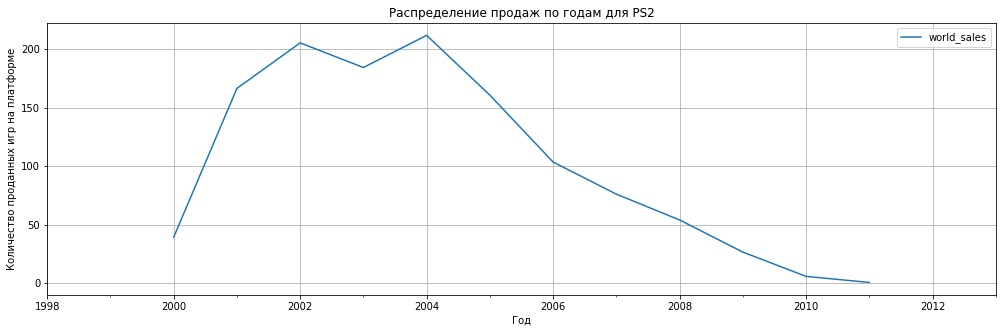

In [17]:
main_platform.query('platform == "PS2"').pivot_table(index='year_of_release', values='world_sales', aggfunc='sum').plot(xlim=('1998', '2013'), grid=True, figsize=(17, 5))
plt.title('Распределение продаж по годам для PS2')
plt.xlabel("Год")
plt.ylabel("Количество проданных игр на платформе")
plt.show()

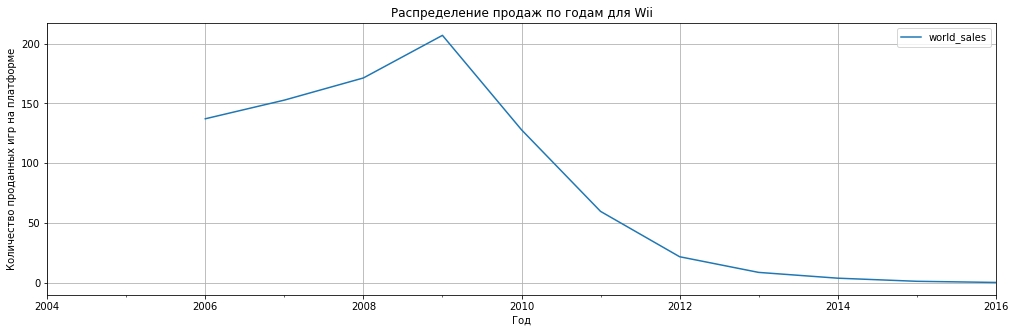

In [18]:
main_platform.query('platform == "Wii"').pivot_table(index='year_of_release', values='world_sales', aggfunc='sum').plot(xlim=('2004', '2016'), grid=True, figsize=(17, 5))
plt.title('Распределение продаж по годам для Wii')
plt.xlabel("Год")
plt.ylabel("Количество проданных игр на платформе")
plt.show()

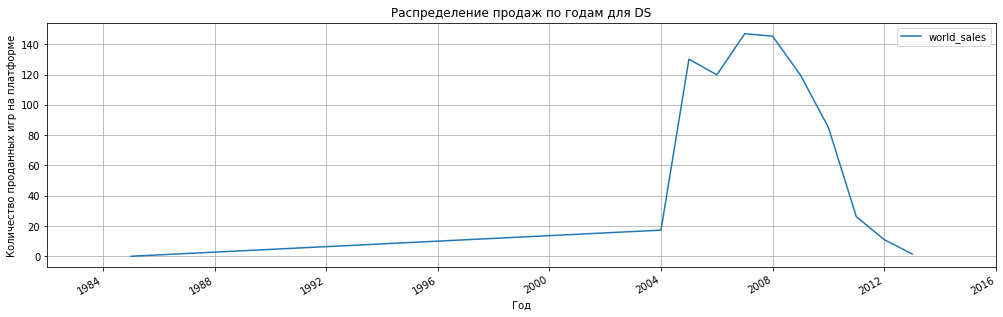

In [19]:
main_platform.query('platform == "DS"').pivot_table(index='year_of_release', values='world_sales', aggfunc='sum').plot(xlim=('1982', '2016'), grid=True, figsize=(17, 5))
plt.title('Распределение продаж по годам для DS')
plt.xlabel("Год")
plt.ylabel("Количество проданных игр на платформе")
plt.show()

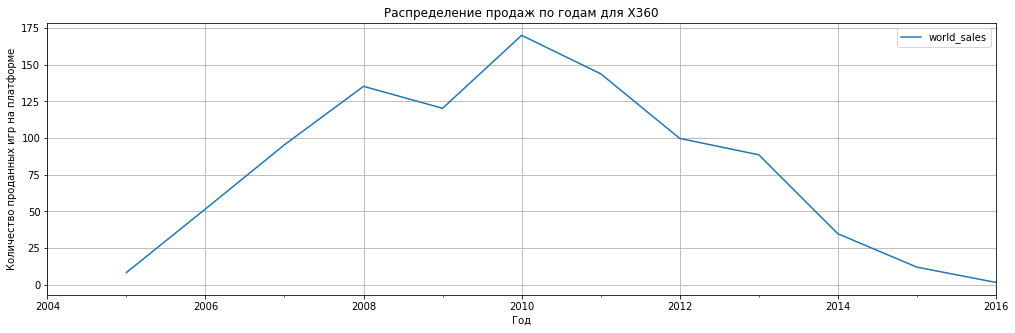

In [20]:
main_platform.query('platform == "X360"').pivot_table(index='year_of_release', values='world_sales', aggfunc='sum').plot(xlim=('2004', '2016'), grid=True, figsize=(17, 5))
plt.title('Распределение продаж по годам для X360')
plt.xlabel("Год")
plt.ylabel("Количество проданных игр на платформе")
plt.show()

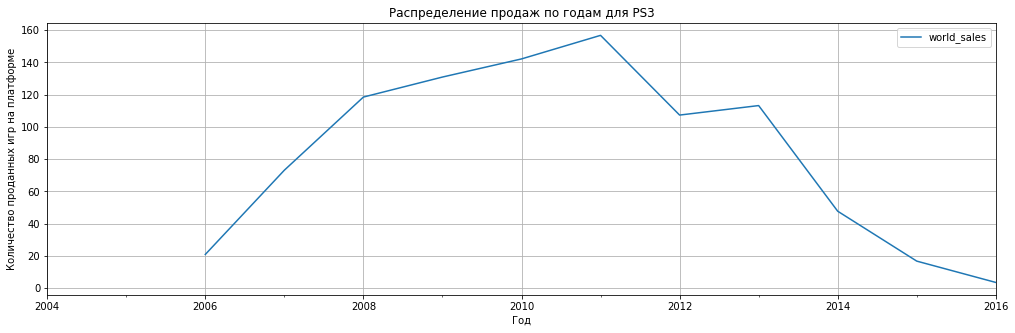

In [21]:
main_platform.query('platform == "PS3"').pivot_table(index='year_of_release', values='world_sales', aggfunc='sum').plot(xlim=('2004', '2016'), grid=True, figsize=(17, 5))
plt.title('Распределение продаж по годам для PS3')
plt.xlabel("Год")
plt.ylabel("Количество проданных игр на платформе")
plt.show()

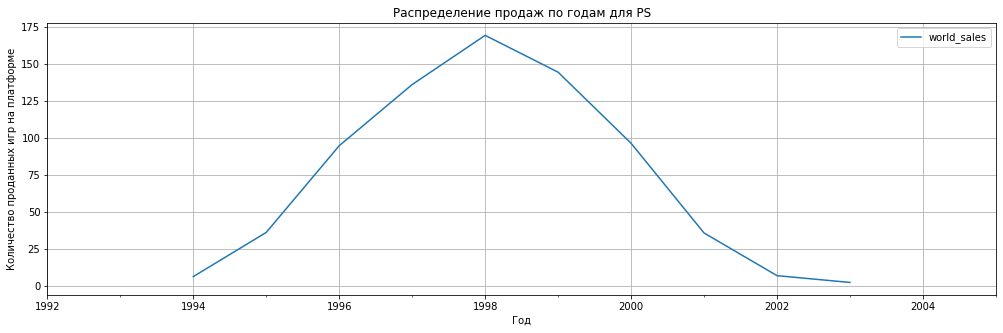

In [22]:
main_platform.query('platform == "PS"').pivot_table(index='year_of_release', values='world_sales', aggfunc='sum').plot(xlim=('1992', '2005'), grid=True, figsize=(17, 5))
plt.title('Распределение продаж по годам для PS')
plt.xlabel("Год")
plt.ylabel("Количество проданных игр на платформе")
plt.show()

**Общий вывод по графикам 6-ти платформ**

Характерный срок появления новых и исчезновения старых платформ составляет в среднем 11 лет. За это время платформа набирает популярность, достигает своего пика и постепенно сходит на нет. Исключение составляет только платформа DS, которая была почти невостребована в течении 20 лет,а затем также пережила свои пик и падение. 

### Определение актуального периода

Представляется, что важны данные за преиод с 2012 года, поскольку он является как бы водоразделом после падения выпуска.

**Заметка:**

Можно предположить, что значительный спад выпуска компьютерных игр после 2011 года связан с увеличением мощности и, соответственно, возможностей компьютеров, что побудило разработчиков делать ставку не на количество, а на качество выпускаемых игр. Но это просто версия.

Выделим данные за определенный нами как актуальный период, чтобы в дальнейшем работать с ними.

In [23]:
actual = df.query('year_of_release > 2011')

### Определение лидеров и аутсайдеров продаж

Для определения лидеров и аутсайдеров продаж среди платформ, сделаем срез данных

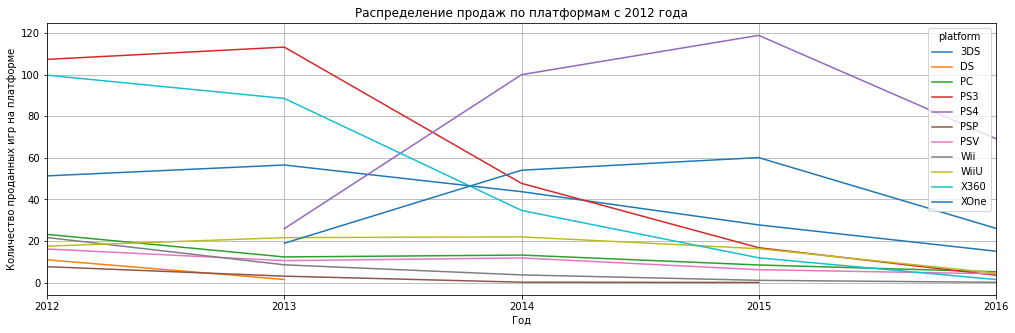

In [24]:
platform_sale.query('year_of_release > 2011').groupby(['platform', 'year_of_release'])['world_sales'].sum().unstack('platform').plot(grid=True, figsize=(17, 5))
plt.title('Распределение продаж по платформам с 2012 года')
plt.xlabel("Год")
plt.ylabel("Количество проданных игр на платформе")
plt.show()

**Вывод**

Изучая график распределения можно сделать вывод о том, что на момент 2016 года наиболее потенциально прибыльной является платформа PS4, однако продажи игр на ней также падают. Также к условно прибыльным можно отнести и XOne, однако и ее популярность стремится к нулю. Тенденция снижения наблюдается по всем платформам, представленным в период с 2012 по 2016 годы.  

### Глобальные продажи игр в разбивке по платформам

Посмотрим на глобальные продажи игр актуального периода на тех платформах, которые выше мы определили как потенциально перспективные. 

Для этого построим диаграммы "ящик с усами" для каждой платформы и посмотрим на результат.

<AxesSubplot:>

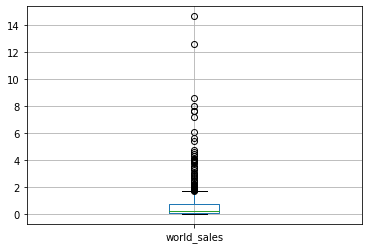

In [25]:
actual.query('platform == "PS4"').boxplot(column='world_sales')

Основные показатели по продажам для платформы PS4 за актуальный период располагаются в диапазоне от 2 до 5 миллионов проданных копий.

<AxesSubplot:>

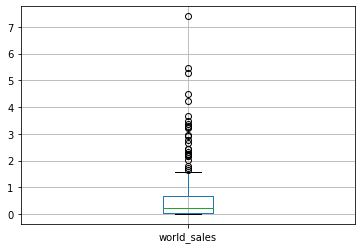

In [26]:
actual.query('platform == "XOne"').boxplot(column='world_sales')

Основные показатели продаж для платформы XOne за актуальный период располагаются в диапазоне от 2 до 4 миллионов проданных копий.

**Вывод** 

За актуальный период продажи двух потенциально прибыльных платформ более менее равны.  

### Нахождение корреляции между отзывами и продажами игр

Рассмотрим влияние отзывов на продажи игр на примере одной популярной платформы. Ею станет PS4, поскольку она показала наибольшую перспективу ранее. 

Создадим две диаграммы рассеяния, на которых отобразим корреляцию между отзывами критиков и продажами (диаграмма 1), а также корреляцию между отзывами простых пользователей и продажами (диаграмма 2).

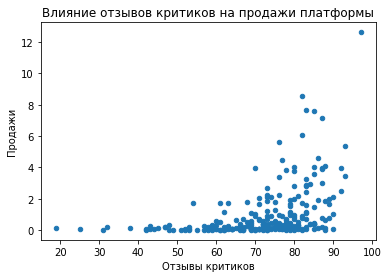

In [27]:
actual.query('platform == "PS4"').plot(x='critic_score', y='world_sales', kind='scatter')
plt.title('Влияние отзывов критиков на продажи платформы')
plt.xlabel('Отзывы критиков')
plt.ylabel('Продажи')
plt.show()

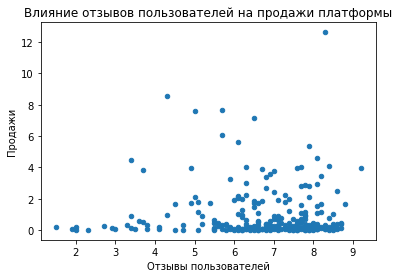

In [28]:
actual.query('platform == "PS4"').plot(x='user_score', y='world_sales', kind='scatter')
plt.title('Влияние отзывов пользователей на продажи платформы')
plt.xlabel('Отзывы пользователей')
plt.ylabel('Продажи')
plt.show()

**Вывод**

На графиках рассеяния заметно влияние отзывов на продажи - чем выше рейтинг, тем выше уровень продаж. Однако стоит заметить, что все таки продажи имеют бОльшую зависимость от отзывов критиков, нежели простых пользователей. Это говорит о том, что пользователи доверяют больше критикам, нежели таким же пользователям.

Корреляцию отобразили, теперь посчитаем.

Воспользуемся методом вычисления коэффициента корреляции Пирсона.

In [29]:
ps4 = actual.query('platform == "PS4"')

In [30]:
ps4['critic_score'].corr(ps4['world_sales'])

0.40656790206178095

In [31]:
ps4['user_score'].corr(ps4['world_sales'])

-0.031957110204556376

**Вывод**

Вычисления подтвердили, что корреляция между отзывами критиков и продажами более значительна, чем между отзывами пользователей и продажами. "Профессионалам" люди доверяют больше, хотя вопрос об их "профессионализме" остается открытым.

### Соотнесение выводов с продажами игр на другой платформе

Теперь соотнесем полученные в предыдущем пункте выводы с данными по другой потенциально прибыльной платформе - XOne.

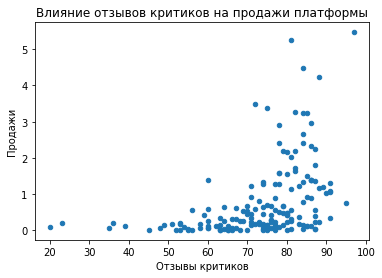

In [32]:
actual.query('platform == "XOne"').plot(x='critic_score', y='world_sales', kind='scatter')
plt.title('Влияние отзывов критиков на продажи платформы')
plt.xlabel('Отзывы критиков')
plt.ylabel('Продажи')
plt.show()

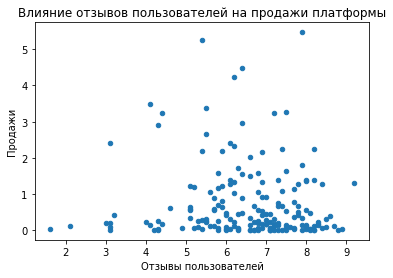

In [33]:
actual.query('platform == "XOne"').plot(x='user_score', y='world_sales', kind='scatter')
plt.title('Влияние отзывов пользователей на продажи платформы')
plt.xlabel('Отзывы пользователей')
plt.ylabel('Продажи')
plt.show()

**Вывод**

Диаграммы рассеяния показывают практически те же результаты, что и в случае с платформой PS4.

Посмотрим также по коэфициенту корреляции Пирсона.

In [34]:
xone = actual.query('platform == "XOne"')

In [35]:
xone['critic_score'].corr(xone['world_sales'])

0.4169983280084017

In [36]:
xone['user_score'].corr(xone['world_sales'])

-0.06892505328279414

**Вывод**

Результаты по корреляции платформы XOne те же, что и для платформы PS4 - пользователи больше доверяют отзывам критиков.

### Общее распределение игр по жанрам

Распределим игры по жанрам и посмотрим, какие из них самые прибыльные. Возьмем данные за период, выделенный нами ранее как актуальный, т.е. начиная с 2012 года.

Для этого сконструируемм сводную таблицу, в которой сумируем прибыль по каждому жанру, а затем распределим их по убыванию. 

In [37]:
actual.pivot_table(index=('genre'), values='world_sales', aggfunc='sum').sort_values(by='world_sales', ascending=False)

,world_sales
genre,
Action,441.12
Shooter,304.73
Role-Playing,192.80
Sports,181.07
Misc,85.04
Platform,61.00
Racing,53.50
Fighting,44.49
Simulation,35.12


**Вывод**

Самым прибыльным жанром является экшен-игры, шутеры, на третьем месте спортивные игры. 

Что можно сказать о самых прибыльных жанрах? Действие таких игр развивается очень динамично и требует высокой концентрации внимания и быстрой реакции на происходящие в игре события, поэтому они привлекают больше внимания пользователей. 

Самыми низкими продажами за актуальный период выделились стратегии и пазлы, требующие большей усидчивости и долгого продумывания своих действий.

## Портрет пользователей из разных регионов

Составим портрет пользователя каждого региона. 

Для этого найдем самые популярные платформы у пользователей разных регионов, жанры, а также посмотрим, влияет ли рейтинг ESRB на продажи в каждом отдельном регионе.

### Топ-5 самых популярных платформ

Для каждого региона составим Топ-5 популярных платформ.

**Северная Америка**

In [38]:
actual.pivot_table(index='platform', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False).head(5)

,na_sales
platform,
X360,140.05
PS4,108.74
PS3,103.38
XOne,93.12
3DS,55.31


Безусловным лидером по Северной Америке является платформа X360, а вот аутсайдером нашего Топ-5 со значительным отрывом от остальных является платформа 3DS.

**Европа**

In [39]:
actual.pivot_table(index='platform', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False).head(5)

,eu_sales
platform,
PS4,141.09
PS3,106.86
X360,74.52
XOne,51.59
3DS,42.64


В Европе ситуация схожа, здесь тоже есть безусловный лидер, это PS4. Однако на втором месте PS3, после которой сильно отстают другие три платформы.

**Япония**

In [40]:
actual.pivot_table(index='platform', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False).head(5)

,jp_sales
platform,
3DS,87.79
PS3,35.29
PSV,21.04
PS4,15.96
WiiU,13.01


Япония как всегда своеобразна. Лидером является платформа 3DS, а все остальные плетутся в хвосте.

### Топ-5 самых популярных жанров

Теперь посмотрим на Топ-5 самых популярных жанров в каждом регионе.

**Северная Америка**

In [41]:
actual.pivot_table(index='genre', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False).head(5)

,na_sales
genre,
Action,177.84
Shooter,144.77
Sports,81.53
Role-Playing,64.00
Misc,38.19


**Европа**

In [42]:
actual.pivot_table(index='genre', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False).head(5)

,eu_sales
genre,
Action,159.34
Shooter,113.47
Sports,69.09
Role-Playing,48.53
Racing,27.29


**Япония**

In [43]:
actual.pivot_table(index='genre', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False).head(5)

,jp_sales
genre,
Role-Playing,65.44
Action,52.80
Misc,12.86
Simulation,10.41
Fighting,9.44


**Общий вывод**

В Северной Америке и Европе первая тройка неизменна - экшен-игры, спортивные симуляторы и шутеры. А вот в Японии предпочитают ролевые игры, которые по популярности значительно превосходят все остальные жанры.

Рынок игр в Японии очень своеобразен, он имеет ряд отличий:

* В Японии не очень принимают соревновательный элемент в играх, бОльшим спросом пользуются игры с элементами мирного сотрудничества, дружбы, а то и вовсе отсутствия хоть какой-то конкуренции, дискомфорта, стресса;
* Кавай (или каваий) - это всё, что мило, симпатично, красиво. Особенность японского восприятия, где даже плакаты министерства обороны страны очень кавайные;
* Антропоморфные персонажи. Очень популярны именно игры с такими персонажами;
* Высокий уровень сервиса и комфорта. Люди в Японии привыкли к качественному контенту и готовы за него платить, что тоже обуславливает выбор того или иного игрового продукта.

### Влияние рейтинга ESRB на продажи в отдельном регионе

Для определения влияния рейтинга ESRB на продажи в отдельном регионе составим сводные таблицы по каждому региону.

Заполним пропуски в рейтинге на 0.

In [44]:
actual['rating'] = actual['rating'].fillna(0)
actual.head(10)

/tmp/ipykernel_272/158246388.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  actual['rating'] = actual['rating'].fillna(0)


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,world_sales
16,Grand Theft Auto V,PS3,2013-01-01,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013-01-01,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015-01-01,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,0,14.63
33,Pokemon X/Pokemon Y,3DS,2013-01-01,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,0,14.60
34,Call of Duty: Black Ops II,PS3,2012-01-01,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79
35,Call of Duty: Black Ops II,X360,2012-01-01,Shooter,8.25,4.24,0.07,1.12,83.0,4.8,M,13.68
42,Grand Theft Auto V,PS4,2014-01-01,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014-01-01,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,0,11.68
60,Call of Duty: Ghosts,X360,2013-01-01,Shooter,6.73,2.56,0.04,0.91,73.0,2.6,M,10.24
62,New Super Mario Bros. 2,3DS,2012-01-01,Platform,3.66,3.14,2.47,0.63,78.0,7.2,E,9.90


In [45]:
actual.pivot_table(index='rating', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False)

,na_sales
rating,
M,231.57
E,114.37
0,103.31
E10+,75.70
T,66.02


In [46]:
actual.pivot_table(index='rating', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False)

,eu_sales
rating,
M,193.96
E,113.03
0,91.50
E10+,55.37
T,52.96


In [47]:
actual.pivot_table(index='rating', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False)

,jp_sales
rating,
0,108.84
E,28.33
T,26.02
M,21.20
E10+,8.19


**Вывод**

Первые четыре позиции в каждом регионе одинаковые - Е (6+), Т(13+), N, М(17+), причем остальные позиции имеют колоссальное отставание. Это позволяет сделать вывод о том, что влияние рейтинга ESRB на продажи действительно прослеживается, однако все же третье место прочно занимают игры без рейтинга, что не позволяет однозначно говорить о влиянии самого рейтинга.

Плюс к тому, вечно выбивающаяся и самобытная Япония показывает на своем рынке лидерство игр без рейтинга, так что в этом регионе влияние рейтинга самое минимальное.

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='rating', ylabel='jp_sales'>

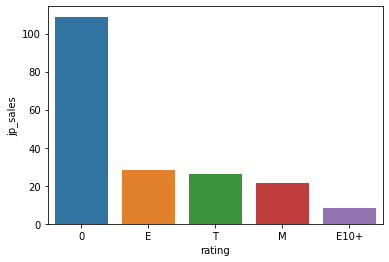

In [48]:
import seaborn as sns

temp = actual.pivot_table(index='rating', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False)
sns.barplot(temp.index, temp['jp_sales'])


## Проверка гипотез

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

**Сформулируем гипотезы:**

* Н0 = Средние пользовательские рейтинги платформ Xbox One == PC;
* Н1 = Средние пользовательские рейтинги платформ Xbox One != PC.

In [49]:
xone = actual.query('platform == "XOne"')['user_score']
pc = actual.query('platform == "PC"')['user_score']
print('Средний пользовательский рейтинг платформы "Xbox One" равен:', xone.mean())
print('Средний пользовательский рейтинг платформы "РС" равен:', pc.mean())

Средний пользовательский рейтинг платформы "Xbox One" равен: 6.521428571428572
Средний пользовательский рейтинг платформы "РС" равен: 6.428640776699029


Заполним пропуски в данных

In [50]:
xone = xone.dropna()

In [51]:
xone.isna().sum()

0

In [52]:
pc = pc.dropna()

In [53]:
pc.isna().sum()

0

Посчитаем дисперсии:

In [54]:
xbox_rating_var = np.var(xone)
print('Дисперсия по средним пользовательским рейтингам Xbox One:', xbox_rating_var)
pc_rating_var = np.var(pc)
print('Дисперсия по средним пользовательским рейтингам PC:', pc_rating_var)

Дисперсия по средним пользовательским рейтингам Xbox One: 1.8965188383045526
Дисперсия по средним пользовательским рейтингам PC: 2.7569952398906588


Дисперсии по обеим платформам не равны. Скорее всего нам потребуется отвергнуть нулевую гипотезу, но проверим еще раз:

In [55]:
alpha = 0.05

results = st.ttest_ind(xone, pc)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.5535080500643661
Не получилось отвергнуть нулевую гипотезу


В данном случае значение p-value близко к нулю и представляет собой экспоненциальную запись числа, а потому мы отвергаем нулевую гипотезу о равенстве средних пользовательских рейтингов платформ Xbox One и PC.

### Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные

**Сформулируем гипотезы:**

* Н0 - средние пользовательские рейтинги жанров Action == Sports;
* Н1 - средние пользовательские рейтинги жанров Action != Sports.

In [56]:
action = actual.query('genre == "Action"')['user_score']
sports = actual.query('genre == "Sports"')['user_score']

Заполним пропуски в данных

In [57]:
action = action.dropna()
sports = sports.dropna()

Подсчитаем дисперсии

In [58]:
action_var = np.var(action)
print('Дисперсия по средним пользовательским рейтингам Action:', action_var)
sports_var = np.var(sports)
print('Дисперсия по средним пользовательским рейтингам Sports:', sports_var)

Дисперсия по средним пользовательским рейтингам Action: 1.8854720340439224
Дисперсия по средним пользовательским рейтингам Sports: 3.0073882971729127


Дисперсии не равны

In [59]:
alpha = 0.05
results2 = st.ttest_ind(action, sports)
    
print('p-значение:', results2.pvalue)
if results2.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 3.7163089460934874e-26
Отвергаем нулевую гипотезу


Результаты наших вычислений показали, что нулевую гипотезу о равенстве средних пользовательских оценок жанров Action и Sports мы отвергаем. А потому главная гипотеза, заявленная в заголовке, которая гласит, что эти средние оценки разные, нами принимается.

## Общий вывод

* Сводная таблица показывает постепенный рост выпуска компьютерных игр до 2012 года, когда произошел значительный спад, почти в два раза;

* Характерный срок появления новых и исчезновения старых платформ составляет в среднем 11 лет. За это время платформа набирает популярность, достигает своего пика и постепенно сходит на нет. Исключение составляет только платформа DS, которая была почти невостребована в течении 20 лет,а затем также пережила свои пик и падение; 

* Представляется, что важны данные за преиод с 2012 года, поскольку он является как бы водоразделом после падения выпуска;

* Изучая график распределения можно сделать вывод о том, что на момент 2016 года наиболее потенциально прибыльной является платформа PS4, однако продажи игр на ней также падают. Также к условно прибыльным можно отнести и XOne, однако и ее популярность стремится к нулю. Тенденция снижения наблюдается по всем платформам, представленным в период с 2012 по 2016 годы;

* За актуальный период продажи двух потенциально прибыльных платформ более менее равны;

* Вычисления подтвердили, что корреляция между отзывами критиков и продажами более значительна, чем между отзывами пользователей и продажами. "Профессионалам" люди доверяют больше, хотя вопрос об их "профессионализме" остается открытым;

* Самым прибыльным жанром является экшен-игры, шутеры, на третьем месте спортивные игры;

* В Северной Америке и Европе первая тройка неизменна - экшен-игры, спортивные симуляторы и шутеры. А вот в Японии предпочитают ролевые игры, которые по популярности значительно превосходят все остальные жанры;

* Первые четыре позиции в каждом регионе одинаковые - Е (6+), Т(13+), М(17+), Е10+, причем остальные позиции имеют колоссальное отставание. Это позволяет сделать вывод о том, что влияние рейтинга ESRB на продажи действительно прослеживается, и оно значительно;

* Гипотеза о равенстве средних пользовательских рейтингов платформ Xbox One и PC **неверна**;

* Гипотеза о неравенстве средних пользовательских рейтингов жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») **верна**.